## 1. Preliminary

# 1.1 Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_pop = pd.read_csv(r"C:\Users\Nada\Desktop\OpenClassRooms\Projet 4\1 Cleaned\DAN-P4-FAO\population.csv")
df_sous_nutrition = pd.read_csv(r"C:\Users\Nada\Desktop\OpenClassRooms\Projet 4\1 Cleaned\DAN-P4-FAO\sous_nutrition.csv")
df_aide_alimentaire = pd.read_csv(r"C:\Users\Nada\Desktop\OpenClassRooms\Projet 4\1 Cleaned\DAN-P4-FAO\aide_alimentaire.csv")
df_dispo_alimentaire = pd.read_csv(r"C:\Users\Nada\Desktop\OpenClassRooms\Projet 4\1 Cleaned\DAN-P4-FAO\dispo_alimentaire.csv")

## 1.2 Data

In [3]:
df_pop.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [4]:
df_pop.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

In [5]:
df_pop.shape

(1416, 3)

In [6]:
df_sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [7]:
df_sous_nutrition.dtypes

Zone      object
Année     object
Valeur    object
dtype: object

In [8]:
df_sous_nutrition.shape

(1218, 3)

In [9]:
df_aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [10]:
df_aide_alimentaire.dtypes

Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

In [11]:
df_aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [12]:
df_aide_alimentaire.shape

(1475, 4)

In [13]:
df_dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [14]:
df_dispo_alimentaire.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [15]:
df_dispo_alimentaire.shape

(15605, 18)

# 2. Explore

## 2.1 Data cleaning

## 2.1.1 Column names

In [16]:
df_pop.rename(columns={'Valeur':'Population'}, inplace=True)
df_sous_nutrition.rename(columns={'Valeur':'Nbre personnes'}, inplace=True)
df_aide_alimentaire.rename(columns={'Valeur':'Quantite aide alimentaire'}, inplace=True)

## 2.1.2 Column units & types

Dataframe population

In [17]:
df_pop['Population']= df_pop['Population']*1_000

Dataframe sous nutrition

In [18]:
df_sous_nutrition['Nbre personnes']=df_sous_nutrition['Nbre personnes'].fillna(0)
df_sous_nutrition['Nbre personnes']=df_sous_nutrition['Nbre personnes'].replace(to_replace = '<0.1', value=0)
df_sous_nutrition['Nbre personnes']=df_sous_nutrition['Nbre personnes'].astype(float)
df_sous_nutrition[['Année debut', 'Année fin']] = df_sous_nutrition['Année'].str.split('-', expand=True)
df_sous_nutrition['Année fin'] =df_sous_nutrition['Année fin'].astype('int')
df_sous_nutrition['Année debut']=df_sous_nutrition['Année debut'].astype('int')
df_sous_nutrition['Année population']=df_sous_nutrition['Année debut']+1
df_sous_nutrition['Nbre personnes']= df_sous_nutrition['Nbre personnes']*1_000_000

Dataframe aide alimentaire

OKKK

Dataframe disponibilite alimentaire

In [19]:
df_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)']=df_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'].fillna(0)
df_dispo_alimentaire['Aliments pour animaux']=df_dispo_alimentaire['Aliments pour animaux'].fillna(0)
df_dispo_alimentaire['Nourriture']=df_dispo_alimentaire['Nourriture'].fillna(0)
df_dispo_alimentaire['Pertes']=df_dispo_alimentaire['Pertes'].fillna(0)
df_dispo_alimentaire['Production']=df_dispo_alimentaire['Production'].fillna(0)

## Demandes de Marc

## Demande 1: La population sous nutrition en 2017

In [20]:
pop_sous_nutrition_2017 = sum (df_sous_nutrition.loc[df_sous_nutrition['Année population']==2017,'Nbre personnes'])
pop_sous_nutrition_2017 = pop_sous_nutrition_2017
print('La population mondiale sous nutrition en 2017 est de',pop_sous_nutrition_2017)

La population mondiale sous nutrition en 2017 est de 535700000.0


In [21]:
pop_tot = df_pop.loc[df_pop['Année']==2017,'Population'].sum()
print('La population mondiale en 2017 est',pop_tot)

La population mondiale en 2017 est 7548134111.0


In [22]:
prop_pers_2017 = round((pop_sous_nutrition_2017/pop_tot)*100,2)
print(f'La proportion de personnes en état de sous nutrition en 2017 est de {prop_pers_2017} %')

La proportion de personnes en état de sous nutrition en 2017 est de 7.1 %


## Demande 2:  Le nombre théorique de personnes qui pourraient être nourries en 2017

In [23]:
t1=df_dispo_alimentaire.loc[:,['Zone','Disponibilité alimentaire (Kcal/personne/jour)']]
t1

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,5.0
1,Afghanistan,1.0
2,Afghanistan,1.0
3,Afghanistan,0.0
4,Afghanistan,4.0
...,...,...
15600,Îles Salomon,45.0
15601,Îles Salomon,11.0
15602,Îles Salomon,0.0
15603,Îles Salomon,0.0


In [24]:
t2=df_pop.loc[(df_pop['Année']==2017), ['Zone','Année','Population']]
t2

,Zone,Année,Population
4,Afghanistan,2017,36296113.0
10,Afrique du Sud,2017,57009756.0
16,Albanie,2017,2884169.0
22,Algérie,2017,41389189.0
28,Allemagne,2017,82658409.0
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402484.0
1396,Viet Nam,2017,94600648.0
1402,Yémen,2017,27834819.0
1408,Zambie,2017,16853599.0


In [25]:
t3=pd.merge(t1,t2, on='Zone')
t3

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Population
0,Afghanistan,5.0,2017,36296113.0
1,Afghanistan,1.0,2017,36296113.0
2,Afghanistan,1.0,2017,36296113.0
3,Afghanistan,0.0,2017,36296113.0
4,Afghanistan,4.0,2017,36296113.0
...,...,...,...,...
15411,Îles Salomon,45.0,2017,636039.0
15412,Îles Salomon,11.0,2017,636039.0
15413,Îles Salomon,0.0,2017,636039.0
15414,Îles Salomon,0.0,2017,636039.0


In [26]:
Disponibilité_alimentaire_2017=t3['Disponibilité alimentaire (Kcal/personne/jour)']*t3['Population']
Disponibilité_alimentaire_2017

0        181480565.0
1         36296113.0
2         36296113.0
3                0.0
4        145184452.0
            ...     
15411     28621755.0
15412      6996429.0
15413            0.0
15414            0.0
15415      2544156.0
Length: 15416, dtype: float64

In [27]:
dispo=Disponibilité_alimentaire_2017.sum()
print('La disponibilité alimentaire pour la population en 2017 est', dispo, 'kcal/personne/jour')

La disponibilité alimentaire pour la population en 2017 est 20918984627331.0 kcal/personne/jour


In [28]:
nbre_humains_nourrie=dispo/2500
print('Le nombre theorique des humains qui peut etre nourrie en 2017 est de', nbre_humains_nourrie)

Le nombre theorique des humains qui peut etre nourrie en 2017 est de 8367593850.9324


In [29]:
ans=(nbre_humains_nourrie/t2['Population'].sum())*100
print(f"Le pourcentage des humaains qui peut etre nourrie en 2017 est de {ans}")

Le pourcentage des humaains qui peut etre nourrie en 2017 est de 110.85645442809752


## Demande 3:  La disponibilité alimentaire des produits végétaux

In [30]:
cols=['Zone', 'Origine', 'Disponibilité alimentaire (Kcal/personne/jour)']
disponibilite_vegetaux_2017=df_dispo_alimentaire.loc[:, cols]
disponibilite_vegetaux_2017

,Zone,Origine,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,animale,5.0
1,Afghanistan,vegetale,1.0
2,Afghanistan,vegetale,1.0
3,Afghanistan,vegetale,0.0
4,Afghanistan,vegetale,4.0
...,...,...,...
15600,Îles Salomon,animale,45.0
15601,Îles Salomon,animale,11.0
15602,Îles Salomon,animale,0.0
15603,Îles Salomon,vegetale,0.0


In [31]:
disponibilite_vegetaux_2017=disponibilite_vegetaux_2017.loc[(disponibilite_vegetaux_2017['Origine']=='vegetale'),:]
disponibilite_vegetaux_2017

,Zone,Origine,Disponibilité alimentaire (Kcal/personne/jour)
1,Afghanistan,vegetale,1.0
2,Afghanistan,vegetale,1.0
3,Afghanistan,vegetale,0.0
4,Afghanistan,vegetale,4.0
6,Afghanistan,vegetale,0.0
...,...,...,...
15595,Îles Salomon,vegetale,0.0
15596,Îles Salomon,vegetale,0.0
15597,Îles Salomon,vegetale,0.0
15603,Îles Salomon,vegetale,0.0


In [32]:
humain_nourrie_vegetaux=pd.merge(disponibilite_vegetaux_2017, t2, on='Zone', how='left' )
humain_nourrie_vegetaux

,Zone,Origine,Disponibilité alimentaire (Kcal/personne/jour),Année,Population
0,Afghanistan,vegetale,1.0,2017.0,36296113.0
1,Afghanistan,vegetale,1.0,2017.0,36296113.0
2,Afghanistan,vegetale,0.0,2017.0,36296113.0
3,Afghanistan,vegetale,4.0,2017.0,36296113.0
4,Afghanistan,vegetale,0.0,2017.0,36296113.0
...,...,...,...,...,...
11891,Îles Salomon,vegetale,0.0,2017.0,636039.0
11892,Îles Salomon,vegetale,0.0,2017.0,636039.0
11893,Îles Salomon,vegetale,0.0,2017.0,636039.0
11894,Îles Salomon,vegetale,0.0,2017.0,636039.0


In [33]:
disponibilite_alimentaire_vegetaux_en_2017=humain_nourrie_vegetaux['Disponibilité alimentaire (Kcal/personne/jour)']*humain_nourrie_vegetaux['Population']*365
dispo_veg=disponibilite_alimentaire_vegetaux_en_2017.sum()
print(f'La disponibilite alimentaire en vegetaux en 2017 est {dispo_veg} Kcal/personne/an')

La disponibilite alimentaire en vegetaux en 2017 est 6300178937197865.0 Kcal/personne/an


In [34]:
nbre_humains_nourrie_2017=dispo_veg/(2_500*365)
print(f"Le nombre de personne qui peuvent etre nourrie des vegetaux en 2017 est {nbre_humains_nourrie_2017}")

Le nombre de personne qui peuvent etre nourrie des vegetaux en 2017 est 6904305684.6004


In [35]:
nbre_humains_nourrie_2017/t2['Population'].sum()*100
print('Le pourcentage des humains pouvant être nourris par des produits origine végétale est de', round(nbre_humains_nourrie_2017/t2['Population'].sum()*100,2), '%')

Le pourcentage des humains pouvant être nourris par des produits origine végétale est de 91.47 %


## Demande 4: L’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentationanimale, celle qui est perdue et celle qui est concrètement utilisée pour alimentation humaine


In [36]:
cols=['Zone', 'Disponibilité intérieure', 'Aliments pour animaux', 'Pertes', 'Nourriture']
df_1=df_dispo_alimentaire.loc[:, cols]
df_1

,Zone,Disponibilité intérieure,Aliments pour animaux,Pertes,Nourriture
0,Afghanistan,53.0,0.0,0.0,53.0
1,Afghanistan,41.0,0.0,2.0,39.0
2,Afghanistan,2.0,0.0,0.0,2.0
3,Afghanistan,0.0,0.0,0.0,0.0
4,Afghanistan,82.0,0.0,0.0,82.0
...,...,...,...,...,...
15600,Îles Salomon,3.0,0.0,0.0,3.0
15601,Îles Salomon,2.0,0.0,0.0,2.0
15602,Îles Salomon,0.0,0.0,0.0,0.0
15603,Îles Salomon,0.0,0.0,0.0,0.0


In [37]:
dispo=df_dispo_alimentaire['Disponibilité intérieure'].sum()
print(f"La disponibilité alimentaire est de {dispo}")

La disponibilité alimentaire est de 9848994.0


In [38]:
cols= ['Aliments pour animaux','Pertes', 'Nourriture']
for col in cols:
    ratio=(df_dispo_alimentaire[col].sum()/dispo)*100
    ans=round(ratio,2)
    print(ans)

13.24
4.61
49.51


### Graphique - demande 4

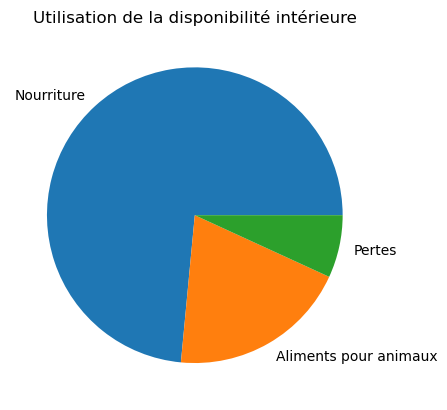

In [39]:
cols=['Nourriture','Aliments pour animaux','Pertes']
ratios=[]
for col in cols:
    ratio=(df_dispo_alimentaire[col].sum()/dispo)*100
    ratio = round(ratio,2)
    ratios.append(ratio)
labels = ['Nourriture', 'Aliments pour animaux', 'Pertes']
plt.pie(ratios, labels=labels)
plt.title('Utilisation de la disponibilité intérieure')
plt.show()

## Demandes de Mélanie

## Demande 1: Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [40]:
cols=['Zone', 'Nbre personnes', 'Année population']
population_sous_nutrition_pays_2017=df_sous_nutrition.loc[:, cols]
population_sous_nutrition_pays_2017=population_sous_nutrition_pays_2017.loc[(population_sous_nutrition_pays_2017['Année population']==2017)]
population_sous_nutrition_pays_2017

,Zone,Nbre personnes,Année population
4,Afghanistan,10500000.0,2017
10,Afrique du Sud,3100000.0,2017
16,Albanie,100000.0,2017
22,Algérie,1300000.0,2017
28,Allemagne,0.0,2017
...,...,...,...
1192,Venezuela (République bolivarienne du),8000000.0,2017
1198,Viet Nam,6500000.0,2017
1204,Yémen,0.0,2017
1210,Zambie,0.0,2017


In [41]:
t2

,Zone,Année,Population
4,Afghanistan,2017,36296113.0
10,Afrique du Sud,2017,57009756.0
16,Albanie,2017,2884169.0
22,Algérie,2017,41389189.0
28,Allemagne,2017,82658409.0
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402484.0
1396,Viet Nam,2017,94600648.0
1402,Yémen,2017,27834819.0
1408,Zambie,2017,16853599.0


In [42]:
proprtion_sous_nutrion=pd.merge(population_sous_nutrition_pays_2017, t2, on='Zone', how='left')
proprtion_sous_nutrion=proprtion_sous_nutrion.loc[:,['Zone','Nbre personnes','Population']]
proprtion_sous_nutrion['Proportion']=(proprtion_sous_nutrion['Nbre personnes']/proprtion_sous_nutrion['Population'])*100
proprtion_sous_nutrion

,Zone,Nbre personnes,Population,Proportion
0,Afghanistan,10500000.0,36296113.0,28.928718
1,Afrique du Sud,3100000.0,57009756.0,5.437666
2,Albanie,100000.0,2884169.0,3.467203
3,Algérie,1300000.0,41389189.0,3.140917
4,Allemagne,0.0,82658409.0,0.000000
...,...,...,...,...
198,Venezuela (République bolivarienne du),8000000.0,29402484.0,27.208586
199,Viet Nam,6500000.0,94600648.0,6.870989
200,Yémen,0.0,27834819.0,0.000000
201,Zambie,0.0,16853599.0,0.000000


In [43]:
df_proportion=proprtion_sous_nutrion.groupby('Zone').sum()[['Proportion']]
df_proportion=df_proportion.sort_values(by='Proportion', ascending=False)
pays_sous_nutrition_2017 = df_proportion.head(10)
pays_sous_nutrition_2017

,Proportion
Zone,
Haïti,48.259182
République populaire démocratique de Corée,47.188685
Madagascar,41.062924
Libéria,38.279742
Lesotho,38.249438
Tchad,37.957606
Rwanda,35.055619
Mozambique,32.810898
Timor-Leste,32.173531


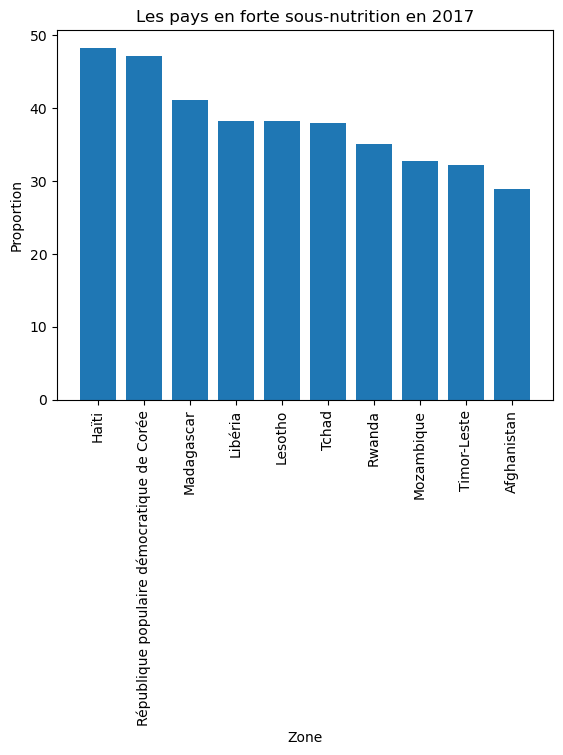

In [44]:
labels = ['Zone', 'Proportion']
plt.bar(pays_sous_nutrition_2017.index, pays_sous_nutrition_2017['Proportion'].values)
plt.xlabel('Zone')
plt.ylabel('Proportion')
plt.title('Les pays en forte sous-nutrition en 2017')
plt.xticks(rotation=90)
plt.show()

## Demande 2: Les pays qui ont le plus bénéficié d’aide depuis 2013

In [45]:
df_aide_alimentaire

,Pays bénéficiaire,Année,Produit,Quantite aide alimentaire
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [46]:
cols=['Pays bénéficiaire', 'Année', 'Quantite aide alimentaire']
pays_beneficaires=df_aide_alimentaire.loc[:, cols]
pays_beneficaires=pays_beneficaires.loc[(pays_beneficaires['Année']>=2013)]
pays_beneficaires

,Pays bénéficiaire,Année,Quantite aide alimentaire
0,Afghanistan,2013,682
1,Afghanistan,2014,335
2,Afghanistan,2013,39224
3,Afghanistan,2014,15160
4,Afghanistan,2013,40504
...,...,...,...
1470,Zimbabwe,2015,96
1471,Zimbabwe,2013,5022
1472,Zimbabwe,2014,2310
1473,Zimbabwe,2015,306


In [47]:
df_2=pays_beneficaires.groupby(['Pays bénéficiaire', 'Année']).sum().reset_index()[['Pays bénéficiaire', 'Année', 'Quantite aide alimentaire']]
df_2=df_2.sort_values(by=['Année','Quantite aide alimentaire'], ascending=[True, False])
df_2

,Pays bénéficiaire,Année,Quantite aide alimentaire
225,Éthiopie,2013,591404
157,République arabe syrienne,2013,563566
189,Soudan,2013,330230
214,Yémen,2013,264764
94,Kenya,2013,220966
...,...,...,...
198,Sri Lanka,2016,328
167,République dominicaine,2016,232
14,Bhoutan,2016,218
26,Bénin,2016,144


In [48]:
df_2.columns

Index(['Pays bénéficiaire', 'Année', 'Quantite aide alimentaire'], dtype='object')

In [49]:
df_2.head(10)

,Pays bénéficiaire,Année,Quantite aide alimentaire
225,Éthiopie,2013,591404
157,République arabe syrienne,2013,563566
189,Soudan,2013,330230
214,Yémen,2013,264764
94,Kenya,2013,220966
192,Soudan du Sud,2013,196330
168,République démocratique du Congo,2013,150320
186,Somalie,2013,139800
8,Bangladesh,2013,131018
0,Afghanistan,2013,128238


In [50]:
df_2=df_2.loc[df_2['Année']==2014, :]
df_2

,Pays bénéficiaire,Année,Quantite aide alimentaire
158,République arabe syrienne,2014,651870
226,Éthiopie,2014,586624
193,Soudan du Sud,2014,450610
190,Soudan,2014,321904
95,Kenya,2014,217418
...,...,...,...
12,Bhoutan,2014,146
75,Géorgie,2014,36
7,Angola,2014,14
44,Cuba,2014,14


## Demande 3: Les pays ayant le plus/le moins de disponibilité/habitant

In [51]:
df_dispo_alimentaire

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,0.0,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,0.0,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,0.0,0.0,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,0.0,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,0.0,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,0.0,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,0.0,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,0.0,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,0.0,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,0.0,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [52]:
cols=['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']
df_3=df_dispo_alimentaire.loc[:, cols]
df_3

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,5.0
1,Afghanistan,1.0
2,Afghanistan,1.0
3,Afghanistan,0.0
4,Afghanistan,4.0
...,...,...
15600,Îles Salomon,45.0
15601,Îles Salomon,11.0
15602,Îles Salomon,0.0
15603,Îles Salomon,0.0


In [53]:
df_3=df_3.groupby('Zone').sum()[['Disponibilité alimentaire (Kcal/personne/jour)']]
df_3

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,2087.0
Afrique du Sud,3020.0
Albanie,3188.0
Algérie,3293.0
Allemagne,3503.0
...,...
Émirats arabes unis,3275.0
Équateur,2346.0
États-Unis d'Amérique,3682.0


In [54]:
df_4=df_3.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False)
df_4

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
...,...
Haïti,2089.0
Afghanistan,2087.0
Madagascar,2056.0


In [55]:
df_4.describe()

,Disponibilité alimentaire (Kcal/personne/jour)
count,174.000000
mean,2847.367816
std,438.546907
min,1879.000000
25%,2530.250000
50%,2830.500000
75%,3186.000000
max,3770.000000


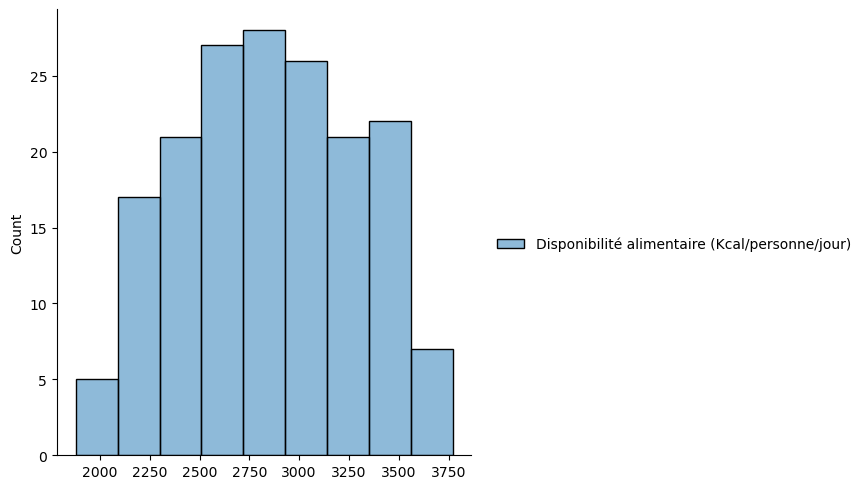

In [56]:
sns.displot(df_4)

In [57]:
pays_plus_dispo= df_4.head(10)
pays_plus_dispo

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


In [58]:
pays_moins_dispo= df_4.tail(10)
pays_moins_dispo

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Éthiopie,2129.0
Ouganda,2126.0
Zimbabwe,2113.0
Tchad,2109.0
République populaire démocratique de Corée,2093.0
Haïti,2089.0
Afghanistan,2087.0
Madagascar,2056.0
Zambie,1924.0


## Demandes supplementaires Marc
Disponibilité intérieure = Production + Importations - Exportations + Variation de stock


Disponibilité intérieure = Semences + Pertes + Nourriture + Aliments pour animaux + Traitement + Autres utilisations

## Demande 1: Utilistaion des cereales

In [59]:
cereales_list = ["Blé","Riz","Orge", "Maïs", "Seigle", "Avoine", "Millet", "Sorgho", "Céreales, Autres"]

In [60]:
cols=['Zone', 'Produit', 'Disponibilité intérieure', 'Aliments pour animaux', 'Nourriture', 'Pertes']
utilisation_cereales=df_dispo_alimentaire.loc[:, cols]
utilisation_cereales

,Zone,Produit,Disponibilité intérieure,Aliments pour animaux,Nourriture,Pertes
0,Afghanistan,Abats Comestible,53.0,0.0,53.0,0.0
1,Afghanistan,"Agrumes, Autres",41.0,0.0,39.0,2.0
2,Afghanistan,Aliments pour enfants,2.0,0.0,2.0,0.0
3,Afghanistan,Ananas,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,82.0,0.0,82.0,0.0
...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,3.0,0.0,3.0,0.0
15601,Îles Salomon,Viande de Volailles,2.0,0.0,2.0,0.0
15602,Îles Salomon,"Viande, Autre",0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,0.0,0.0,0.0,0.0


In [61]:
df_dispo_alimentaire

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,0.0,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,0.0,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,0.0,0.0,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,0.0,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,0.0,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,0.0,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,0.0,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,0.0,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,0.0,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,0.0,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [62]:
cols=['Zone', 'Produit', 'Disponibilité intérieure', 'Aliments pour animaux', 'Nourriture', 'Pertes']
utilisation_cereales=df_dispo_alimentaire.loc[:, cols]
utilisation_cereales

,Zone,Produit,Disponibilité intérieure,Aliments pour animaux,Nourriture,Pertes
0,Afghanistan,Abats Comestible,53.0,0.0,53.0,0.0
1,Afghanistan,"Agrumes, Autres",41.0,0.0,39.0,2.0
2,Afghanistan,Aliments pour enfants,2.0,0.0,2.0,0.0
3,Afghanistan,Ananas,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,82.0,0.0,82.0,0.0
...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,3.0,0.0,3.0,0.0
15601,Îles Salomon,Viande de Volailles,2.0,0.0,2.0,0.0
15602,Îles Salomon,"Viande, Autre",0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,0.0,0.0,0.0,0.0


In [63]:
utilisation_cereales=utilisation_cereales.loc[(utilisation_cereales['Produit']=='Céréales, Autres'),:].copy()
utilisation_cereales.rename(columns={'Nourriture':'Aliments pour humains'}, inplace=True)
utilisation_cereales=utilisation_cereales.sort_values(by='Disponibilité intérieure', ascending=False)
utilisation_cereales

,Zone,Produit,Disponibilité intérieure,Aliments pour animaux,Aliments pour humains,Pertes
11007,Pologne,"Céréales, Autres",7171.0,6238.0,88.0,145.0
15454,Éthiopie,"Céréales, Autres",3274.0,0.0,2495.0,234.0
361,Allemagne,"Céréales, Autres",2778.0,2373.0,56.0,53.0
4860,France,"Céréales, Autres",2527.0,2421.0,47.0,0.0
4955,Fédération de Russie,"Céréales, Autres",1414.0,1304.0,15.0,34.0
...,...,...,...,...,...,...
14894,Zambie,"Céréales, Autres",-3.0,0.0,0.0,0.0
10534,Pakistan,"Céréales, Autres",-6.0,0.0,0.0,0.0
15173,Émirats arabes unis,"Céréales, Autres",-40.0,1.0,0.0,0.0
6208,Inde,"Céréales, Autres",-62.0,0.0,0.0,0.0


In [64]:
dispo=utilisation_cereales['Disponibilité intérieure'].sum()
aliments_animaux=utilisation_cereales['Aliments pour animaux'].sum()
aliments_humains=utilisation_cereales['Aliments pour humains'].sum()
pourcentage_1= (aliments_animaux/dispo)*100
pourcentage_2= (aliments_humains/dispo)*100
print(f"Proportion d'alimentation cereales pour les animaux : {pourcentage_1:.2f}%")
print(f"Proportion d'alimentation cereales pour les humains: {pourcentage_2: .2f}%")

Proportion d'alimentation cereales pour les animaux : 69.26%
Proportion d'alimentation cereales pour les humains:  19.37%


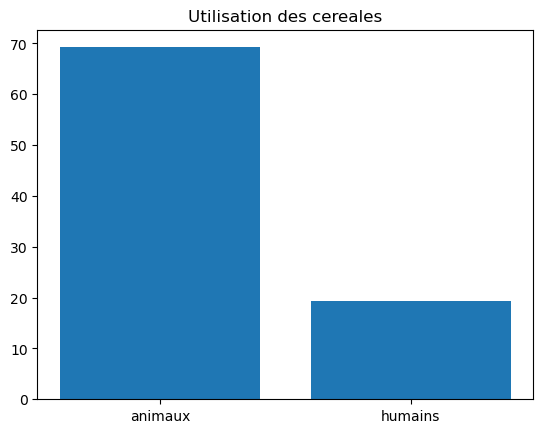

In [65]:
pourcentage=[pourcentage_1, pourcentage_2]
labels=['animaux','humains']
plt.bar(labels, pourcentage,)
plt.title('Utilisation des cereales')
plt.show()

## Demande 2: Utilisation du Manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition

In [66]:
cols=['Zone', 'Produit', 'Production','Disponibilité intérieure', 'Exportations - Quantité', 'Importations - Quantité', 'Aliments pour animaux', 'Nourriture']
demande_sup_2=df_dispo_alimentaire.loc[:, cols]
demande_sup_2=demande_sup_2.loc[(demande_sup_2['Zone']=='Thaïlande') & (demande_sup_2['Produit']=='Manioc'), :]
demande_sup_2

,Zone,Produit,Production,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Aliments pour animaux,Nourriture
13809,Thaïlande,Manioc,30228.0,6264.0,25214.0,1250.0,1800.0,871.0


In [67]:
demande_supp_2=pd.merge(demande_sup_2, df_proportion, on='Zone', how='left')
demande_supp_2

,Zone,Produit,Production,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Aliments pour animaux,Nourriture,Proportion
0,Thaïlande,Manioc,30228.0,6264.0,25214.0,1250.0,1800.0,871.0,8.958268


In [68]:
Utilisation_manioc = (demande_supp_2['Nourriture']/demande_supp_2['Production'])*100
pourcentage_1 = Utilisation_manioc.iloc[0]
quantite_exporte=(demande_supp_2['Exportations - Quantité']/demande_supp_2['Production'])*100
pourcentage_2=quantite_exporte.iloc[0]
print(f"Le pourcentage d'utilisation du Manioc en Thailande est de {pourcentage_1:.2f}%")
print(f"Le pourcentage du Manioc exporté est de {pourcentage_2:.2f}%")

Le pourcentage d'utilisation du Manioc en Thailande est de 2.88%
Le pourcentage du Manioc exporté est de 83.41%


In [69]:
ans=df_dispo_alimentaire.loc[:, ['Zone', 'Produit', 'Origine', 'Production', 'Aliments pour animaux', 'Nourriture', 'Exportations - Quantité', 'Importations - Quantité']]
ans=ans.loc[(ans['Zone']=='Thaïlande'), :]
ans

,Zone,Produit,Origine,Production,Aliments pour animaux,Nourriture,Exportations - Quantité,Importations - Quantité
13759,Thaïlande,Abats Comestible,animale,45.0,0.0,75.0,5.0,33.0
13760,Thaïlande,"Agrumes, Autres",vegetale,12.0,0.0,6.0,6.0,2.0
13761,Thaïlande,"Alcool, non Comestible",vegetale,447.0,0.0,0.0,110.0,21.0
13762,Thaïlande,Aliments pour enfants,vegetale,0.0,0.0,12.0,7.0,19.0
13763,Thaïlande,Ananas,vegetale,2209.0,0.0,671.0,1449.0,9.0
...,...,...,...,...,...,...,...,...
13849,Thaïlande,Viande de Suides,animale,891.0,0.0,871.0,22.0,1.0
13850,Thaïlande,Viande de Volailles,animale,1470.0,0.0,917.0,536.0,11.0
13851,Thaïlande,"Viande, Autre",animale,0.0,0.0,2.0,96.0,4.0
13852,Thaïlande,Vin,vegetale,0.0,0.0,8.0,8.0,16.0


Qu'est-ce que les Thaïlandais mangent le plus ?

In [70]:
ans = ans.loc[ans['Nourriture']==ans['Nourriture'].max()]
ans

,Zone,Produit,Origine,Production,Aliments pour animaux,Nourriture,Exportations - Quantité,Importations - Quantité
13837,Thaïlande,Riz (Eq Blanchi),vegetale,24054.0,2405.0,7677.0,6860.0,50.0


Demandes supplementaires Melanie

Taux de consommation des produits d'origine animale et vegetale

In [71]:
cols=['Zone', 'Produit', 'Origine', 'Disponibilité intérieure', 'Nourriture']
consommation=df_dispo_alimentaire.loc[:, cols]
consommation

,Zone,Produit,Origine,Disponibilité intérieure,Nourriture
0,Afghanistan,Abats Comestible,animale,53.0,53.0
1,Afghanistan,"Agrumes, Autres",vegetale,41.0,39.0
2,Afghanistan,Aliments pour enfants,vegetale,2.0,2.0
3,Afghanistan,Ananas,vegetale,0.0,0.0
4,Afghanistan,Bananes,vegetale,82.0,82.0
...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,3.0,3.0
15601,Îles Salomon,Viande de Volailles,animale,2.0,2.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0


In [72]:
Totale=sum(consommation['Nourriture'])
Totale

4876258.0

In [73]:
proportion_anim=consommation.loc[(consommation['Origine']=='animale'), :].sum()[['Nourriture']]
prop_1=(proportion_anim/Totale)*100
prop_1

Nourriture    24.27509
dtype: object

In [74]:
proportion_hum=consommation.loc[(consommation['Origine']=='vegetale'), :].sum()[['Nourriture']]
prop_2=(proportion_hum/Totale)*100
prop_2

Nourriture    75.72491
dtype: object

Consommation par pays

In [75]:
# Créer un DataFrame pour les produits d'origine végétale
consommation_vegetale = consommation[consommation['Origine'] == 'vegetale']

# Créer un DataFrame pour les produits d'origine animale
consommation_animale = consommation[consommation['Origine'] == 'animale']

# Grouper par 'Zone' et sum pour 'Nourriture' pour les produits d'origine végétale
consommation_vegetale_grouped = consommation_vegetale.groupby('Zone').sum()[['Nourriture']]
# Grouper par 'Zone' et sum pour 'Nourriture' pour les produits d'origine animale
consommation_animale_grouped = consommation_animale.groupby('Zone').sum()[['Nourriture']]

# Utiliser la méthode pivot_table pour obtenir la somme de la nourriture par pays pour les produits d'origine végétale et animale
consommation_2017 = consommation.pivot_table(index='Zone', columns='Origine', values='Nourriture', aggfunc='sum')

# Afficher le DataFrame résultant
consommation_2017


Origine,animale,vegetale
Zone,,
Afghanistan,2442.0,8293.0
Afrique du Sud,7371.0,22441.0
Albanie,1235.0,2241.0
Algérie,6932.0,24797.0
Allemagne,32159.0,47079.0
...,...,...
Émirats arabes unis,2122.0,4426.0
Équateur,3425.0,5149.0
États-Unis d'Amérique,131767.0,189122.0


In [76]:
consommation_2017['Nourriture_humains']=consommation_2017['animale']+consommation_2017['vegetale']
consommation_2017['animale_prop']=(consommation_2017['animale']/consommation_2017['Nourriture_humains'])*100
consommation_2017['vegetale_prop']=(consommation_2017['vegetale']/consommation_2017['Nourriture_humains'])*100
consommation_2017=consommation_2017.sort_values(by=['animale_prop'], ascending=False)
consommation_2017

Origine,animale,vegetale,Nourriture_humains,animale_prop,vegetale_prop
Zone,,,,,
Finlande,3081.0,2857.0,5938.0,51.886157,48.113843
Islande,145.0,156.0,301.0,48.172757,51.827243
Suède,4658.0,5200.0,9858.0,47.250964,52.749036
Chine - RAS de Hong-Kong,2714.0,3064.0,5778.0,46.971270,53.028730
Pays-Bas,7932.0,9992.0,17924.0,44.253515,55.746485
...,...,...,...,...,...
Côte d'Ivoire,857.0,12671.0,13528.0,6.335009,93.664991
Nigéria,6625.0,107814.0,114439.0,5.789110,94.210890
Malawi,490.0,8117.0,8607.0,5.693041,94.306959


In [77]:
df_elevage = pd.read_csv(r"C:\Users\Nada\Desktop\OpenClassRooms\Projet 4\Cleaned\DAN-P4-FAO\FAOSTAT_data_fr_4-13-2023.csv.crdownload")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Nada\\Desktop\\OpenClassRooms\\Projet 4\\Cleaned\\DAN-P4-FAO\\FAOSTAT_data_fr_4-13-2023.csv.crdownload'

In [ ]:
cols=['Zone','Produit','Année','Valeur']
df_elevage=df_elevage.loc[:, cols]
df_elevage.rename(columns={'Valeur':'Densité'}, inplace=True)

In [ ]:
df_elevage=df_elevage.sort_values(by='Densité', ascending=False)
df_elevage

In [ ]:
Environnement=pd.merge(consommation_2017, df_elevage, on='Zone', how='left')
Environnement=Environnement.sort_values(by='Densité', ascending=False)
Environnement.head(10)

In [ ]:
ans = Environnement.loc[Environnement['Densité']==Environnement['Densité'].max()]
ans